<a href="https://colab.research.google.com/github/SaraF-lab/a/blob/main/Deuteron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

8000.0


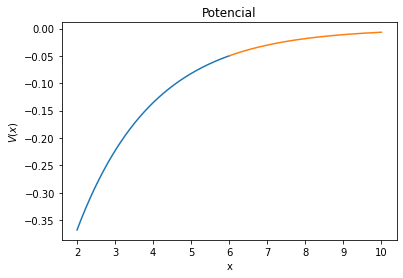

In [62]:
from numpy.matrixlib.defmatrix import N
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np 

#Se definen las constantes
hbar = 1
m = 1
c = 2*m/hbar
pot1 = 1
E = -2.2
r = 1
l = 1

xi1 = 2.0
xi2 = 10.0
xm = 6.0
h = 0.0005
a = 2.0


# Cantidad de datos

n1 = int(np.abs((xm-xi1)/h))
n2 = int(np.abs((xm-xi2)/h))

#Arreglos y condiciones iniciales

x1 = np.zeros(n1+2)
x1[0] = xi1
x2 = np.zeros(n2+2)
x2[0] = xi2
du2 = np.zeros(n1+2)
du = np.zeros(n1+2)
du[0] = 0.1
u = np.zeros(n1+2)
u[0] = 0
dp2 = np.zeros(n2+2)
dp = np.zeros(n2+2)
dp[0] = 0
p = np.zeros(n2+2)
p[0] = 0.1
potenciala = np.zeros(n1+2)
potencialb = np.zeros(n2+2)

#Potencial

for i in range(n1+1):
  x1[i+1] = x1[i] + h
  x2[i+1] = x2[i] - h

for i in range(n1+2):
  potenciala[i] = -1*np.exp(-1*(x1[i])/a)

for i in range(n2+2):
  potencialb[i] = -1*np.exp(-1*(x2[i])/a)


k = 2*m/(hbar**2)

#Gráfica del potencial
plt.figure()
plt.plot(x1,potenciala)
plt.plot(x2,potencialb)
plt.xlabel(r"x")
plt.ylabel(r"$V(x)$")
plt.title(r"Potencial")
plt.savefig("Potencial")



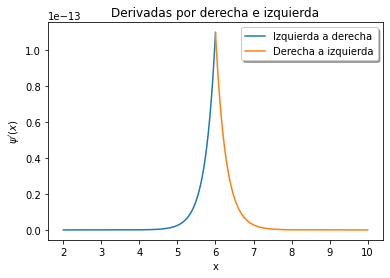

[2.     2.0005 2.001  ... 5.9995 6.     6.0005] [10.      9.9995  9.999  ...  6.0005  6.      5.9995]


In [64]:
#RK4

f=0.00001

for i in range(n1+1): #Por derecha

  du2[i] = k*(f*np.exp(-1*(x1[i])/a) -E)*du[i]

  k1 = k*(f*np.exp(-1*(x1[i])/a)-E)*du[i]
  k2 = k*(f*np.exp(-1*(x1[i]+0.5*h)/a)-E)*(du[i]+(0.5)*(k1)*(h))
  k3 = k*(f*np.exp(-1*(x1[i]+0.5*h)/a)-E)*(du[i]+(0.5)*(k2)*(h))
  k4 = k*(f*np.exp(-1*(x1[i]+h)/a))*(du[i]+k3*h)

  du[i+1] = du[i]+(h/6*(k1+2*k2+2*k3+k4))

  m1 = k*(f*np.exp(-1*(x1[i])/a)-E)*u[i]
  m2 = k*(f*np.exp(-1*(x1[i]+0.5*h)/a)-E)*(u[i]+(0.5)*(m1)*(h))
  m3 = k*((f*np.exp(-1*(x1[i]+0.5*h)/a)-E))*(u[i]+(0.5)*(m2)*(h))
  m4 = k*(f*np.exp(-1*(x1[i]+h)/a))*(u[i]+k3*h)

  u[i+1]=u[i]+h/6*(m1+2*m2+2*m3+m4)


for i in range(n2+1): #Por izquierda

  dp2[i] = k*(f*np.exp(-1*(x2[i])/a) -E)*p[i]

  l1 = k*(f*np.exp(-1*(x2[i])/a)-E)*dp[i]
  l2 = k*(f*np.exp(-1*(x2[i]+0.5*h)/a)-E)*(dp[i]+(0.5)*(l1)*(h))
  l3 = k*(f*np.exp(-1*(x2[i]+0.5*h)/a)-E)*(dp[i]+(0.5)*(l2)*(h))
  l4 = k*(f*np.exp(-1*(x2[i]+h)/a))*(dp[i]+k3*h)

  dp[i+1] = dp[i]+(h/6*(l1+2*l2+2*l3+l4))

  s1 = k*((f*np.exp(-1*(x2[i])/a)-E)*p[i])
  s2 = k*(f*np.exp(-1*(x2[i]+0.5*h)/a)-E)*(p[i]+(0.5)*(s1)*(h))
  s3 = k*(f*np.exp(-1*(x2[i]+0.5*h)/a)-E)*(p[i]+(0.5)*(s2)*(h))
  s4 = k*(f*np.exp(-1*(x2[i]+h)/a))*(p[i]+k3*h)

  p[i+1]= p[i]+h/6*(s1+2*s2+2*s3+s4)

#Gráfica de las derivadas

plt.figure()
plt.plot(x1,(u/(10**(10))),label='Izquierda a derecha')
plt.plot(x2,p/(10**(18.33)),label='Derecha a izquierda')
plt.xlabel(r"x")
plt.ylabel(r"$\psi'(x)$")
plt.title(r"Derivadas por derecha e izquierda")
plt.legend(shadow=True)
plt.savefig("devs2")
plt.show()
print(x1,x2)